# Analisi statistica dei dati relativi al decadimento della particella K*

## Abstract
La particella K* è altamente instabile, e ha una vita media di 10<sup>-11</sup> secondi. Per questo motivo, non possiamo misurarne direttamente l'esistenza, ma possiamo provare che esiste tramite un'analisi statistica. Lo scopo di questa esperienza di laboratorio è di:

1. Simulare degli eventi di collisione dell'LHC tramite il metodo di generazione Montecarlo. In particolare, abbiamo simulato eventi registrati dall'esperimento _[ALICE][1]_.
2. Analizzare i dati raccolti e dimostrare l'esistenza della particella K*, senza osservarla direttamente.

Il codice usato per la simulazione dei dati è disponibile su [GitHub][2].

[1]: https://en.wikipedia.org/wiki/ALICE_experiment
[2]: https://github.com/P2-718na/ALICE-simulation

## Generazione dei dati
Il numero di eventi di un esperimento di _ALICE_ è dell'ordine di 10<sup>5</sup>-10<sup>7</sup>, ognuno dei quali conta 10<sup>2</sup>-10<sup>4</sup> particelle. Tuttavia, in ogni evento appare solo un numero limitato di tipi di particelle. Visto che le particelle dello stesso tipo sono distinguibili solo in base alla propria quantità di moto, possiamo generare un campione di dati tenendo in considerazione solamente:

1. Frequenza relativa con cui appare ogni tipo di particella.
2. PDF della distribuzione dei momenti delle particelle.

Questi sono i parametri che abbiamo utilizzato per la generazione:

|   Parametro                    |   Valore              |
|--------------------------------|-----------------------|
| n° eventi                      | 10<sup>5</sup>        |
| n° particelle per evento       | 100                   |
| PDF modulo del momento         | Esponenziale, media 1 |
| PDF angoli azimutali e polari  | Uniforme              |

| Particella | Frequenza relativa |
|------------|--------------------|
| p+         | 40.0%              |
| p-         | 40.0%              |
| k+         |  5.0%              |
| k-         |  5.0%              |
| p+         |  4.5%              |
| p-         |  4.5%              |
| K*         |  1.0%              |

## Analisi dei dati

### 1. Correttezza dei dati generati
Mostriamo che i dati generati sono consistenti con quello che ci aspettiamo. Importiamo gli istrogrammi:

In [1]:
TFile* histograms = new TFile("../histograms/kstar-decay-hist.root","READ");

In [2]:
TH1F* ParticleDist     = (TH1F*)histograms->Get("ParticleDist");
TH1F* AzimuthAngleDist = (TH1F*)histograms->Get("AzimuthAngleDist");
TH1F* PolarAngleDist   = (TH1F*)histograms->Get("PolarAngleDist");
TH1F* MomentumDist     = (TH1F*)histograms->Get("MomentumDist");

Creiamo una canvas per visualizzare i risultati:

In [3]:
gStyle->SetOptFit(1111);
gStyle->SetOptStat("neM");

TCanvas* cv = new TCanvas();

  1. Verifichiamo che il numero di ingressi sia dell'ordine di 10<sup>7</sup>. Il numero di ingressi può variare visto che, quando viene generata una K*, questa decade. I prodotti del decadimento sono considerati solo negli istogrammi di massa invariante, mentre le risonanze K* vengono considerate solo nei rimanenti istogrammi.

Il numero è corretto, e può essere visualizzato negli istogrammi che seguono.

  2. Verifichiamo che i tipi di particelle generate seguono le proporzioni fissate, entro gli errori statistici.

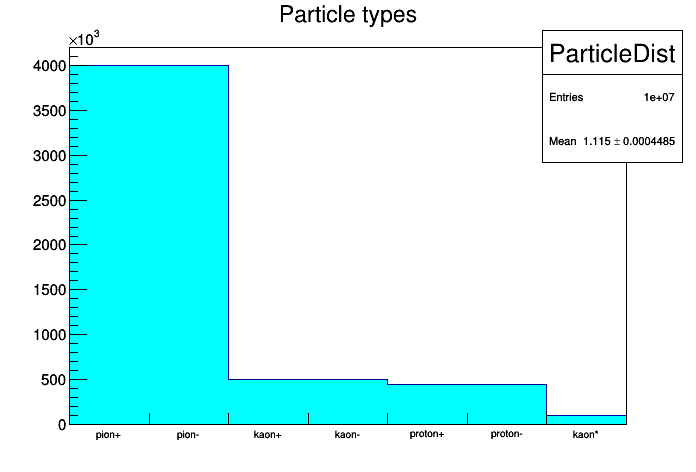

In [4]:
ParticleDist->SetFillColor(7);
ParticleDist->Draw();
cv->Draw();

  3. Verifichiamo che le distribuzioni angolari siano uniformi:

In [5]:
TF1* angleFit = new TF1("angleFit", "[0]", 10000);

angleFit->SetParNames("A");

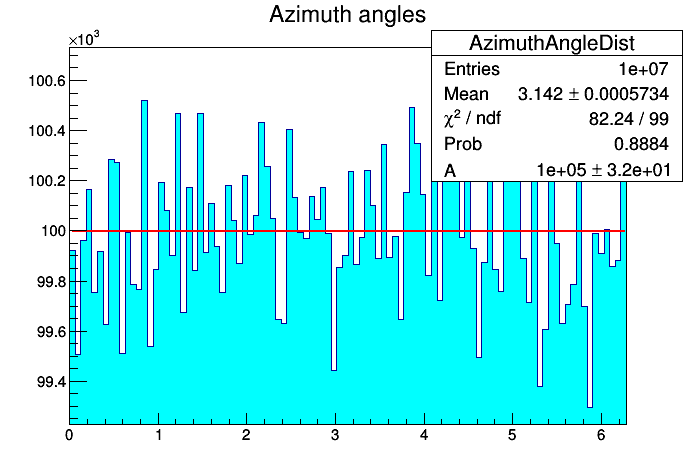

In [6]:
AzimuthAngleDist->Fit(angleFit, "Q");

AzimuthAngleDist->SetFillColor(7);
AzimuthAngleDist->Draw();
angleFit->Draw("SAME");

cv->Draw();

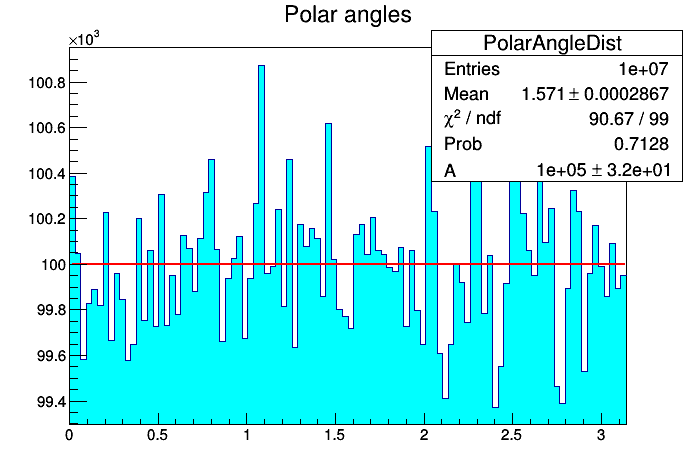

In [7]:
PolarAngleDist->Fit(angleFit, "Q");

PolarAngleDist->SetFillColor(7);
PolarAngleDist->Draw();
angleFit->Draw("SAME");

cv->Draw();

  Eseguendo un fit uniforme `y = A` dei due grafici, otteniamo valori coerenti con una distribuzione uniforme:
  
|   Grafico        | Parametro | Valore atteso | Valore ottenuto |
|------------------|-----------|---------------|-----------------|
| Angolo azimutale | A         | 10<sup>5</sup>| 99,990 ± 30     | 
| Angolo polare    | A         | 10<sup>5</sup>| 99,990 ± 30     |

  4. Verifichiamo che la distribuzione dell'impulso sia una funzione esponenziale con media 1: 

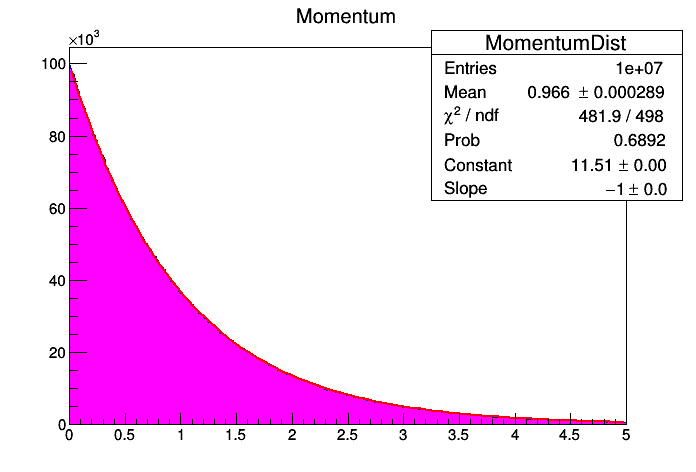

In [8]:
MomentumDist->SetFillColor(6);
MomentumDist->Fit("expo", "Q");
MomentumDist->Draw();

cv->Draw();

Eseguendo un fit esponenziale del grafico, otteniamo valori coerenti con una distribuzione esponenziale. In particolare, il parametro `t = -1 / Slope` vale:

|   Grafico | Parametro | Valore atteso | Valore ottenuto |
|-----------|-----------|---------------|-----------------|
| Momento   | 7         | 1             | 1.000 ± 0.001   | 

### 2. Analisi degli istogrammi di massa invariante
Analizziamo gli istogrammi della massa invariante, calcolata rispetto a diverse coppie di particelle. Importiamo gli istrogrammi:

In [9]:
TH1F* InvMassOppCharge    = (TH1F*)histograms->Get("InvMassOppCharge");    // (1)
TH1F* InvMassSameCharge   = (TH1F*)histograms->Get("InvMassSameCharge");   // (2)
TH1F* InvMassPKOppCharge  = (TH1F*)histograms->Get("InvMassPKOppCharge");  // (3)
TH1F* InvMassPKSameCharge = (TH1F*)histograms->Get("InvMassPKSameCharge"); // (4)
TH1F* InvMassPKCouple     = (TH1F*)histograms->Get("InvMassPKCouple");     // (5)

Nota: l'istogramma (5) è un istogramma di controllo, e non sarebbe ottenibile nel mondo reale. Il motivo è che questo istogramma raccoglie la massa invariante calcolata _solo tra le coppie di particelle generate dai decadimenti_. Grazie alla nostra simulazione, è facile risalire a quali sono queste coppie, ma nel mondo reale ciò sarebbe impossiible.

  1. Sappiamo che dal decadimento della K*, si generano coppie Pione-Kaone di segno opposto (come conseguenza della legge di conservazione della carica). Questo significa che, tra tutte le particelle generate, il numero di coppie  Pione-Kaone di segno opposto sarà leggermente più alto di quelle di segno concorde. Di conseguenza, sottraendo il grafico (4) dal (3), ci aspettiamo di ottenere un picco in corrispondenza della massa della K*, consistente con il grafico (5).

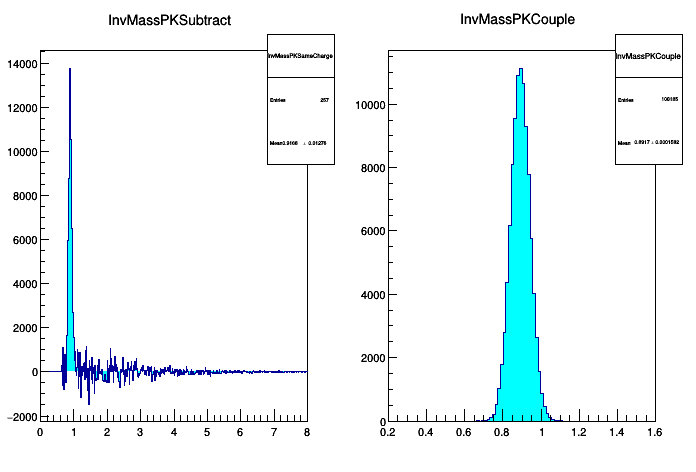

In [10]:
TH1F* InvMassPKSubtract = new TH1F(*InvMassPKSameCharge) ;
InvMassPKSubtract->SetTitle("InvMassPKSubtract");
InvMassPKSubtract->Add(InvMassPKSameCharge, InvMassPKOppCharge, -1, 1); // (3) - (4)

TCanvas* cv2 = new TCanvas();
cv2->Divide(2, 1);

cv2->cd(1);
InvMassPKSubtract->SetFillColor(7);
InvMassPKSubtract->Draw("hist");

cv2->cd(2);
InvMassPKCouple->SetFillColor(7);
InvMassPKCouple->Draw("hist");
cv2->Draw();

I due istogrammi ottenuti sono consistenti, con un picco attorno al valore atteso di `0.89`.

  2. Eseguiamo la stessa operazione con i grafici (1) e (2). Ci aspettiamo dei risultati consistenti.

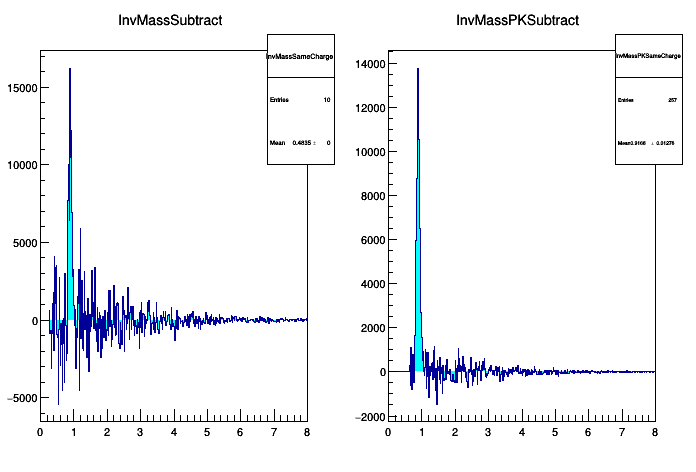

In [11]:
TH1F* InvMassSubtract = new TH1F(*InvMassSameCharge) ;
InvMassSubtract->SetTitle("InvMassSubtract");
InvMassSubtract->Add(InvMassSameCharge, InvMassOppCharge, -1, 1); // (1) - (2)

cv2->cd(1);
InvMassSubtract->SetFillColor(7);
InvMassSubtract->Draw("hist");

cv2->cd(2);
InvMassPKSubtract->SetFillColor(7);
InvMassPKSubtract->Draw("hist");
cv2->Draw();

L'istogramma ottenuto sottraendo (2) da (1) è consistente con quello ottenuto sottraendo (4) da (3).

### 3. Analisi della massa della K*
Ora possiamo analizzare i grafici ottenuti. Ci aspettiamo che i grafici appena ottenuti seguano una distribuzione gaussiana, con media corrispondente alla massa di K* e sigma corrispondente alla vita media di K*.

Nota: se questi fossero dati reali, ci aspetteremmo una distribuzione _lorentziana_. Otteniamo una distribuzione gaussiana perchè durante la generazione dei dati, abbiamo usato un algoritmo semplificato per simulare il decadimento di K*, ottenendo questo comportamento.

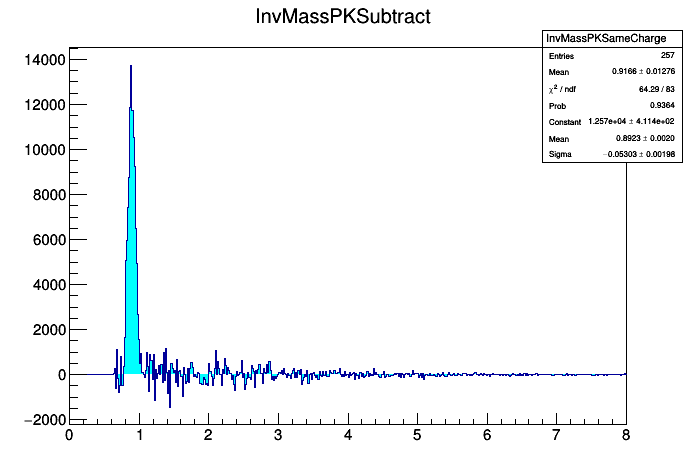

In [12]:
cv->cd();

InvMassPKSubtract->Fit("gaus", "QB", "", 0, 2);
InvMassPKSubtract->Draw("hist");
cv->Draw();

La distribuzione gaussiana fitta perfettamente il grafico e i dati ottenuti sono coerenti con quelli attesi (entro le incertezze).